# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [258]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [259]:
# Checking the number of mice.
number_of_mice = data_df["Mouse ID"].nunique()
print(f"The Number of mice is {number_of_mice}")


The Number of mice is 249


In [260]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
unique_ID = data_df.loc[data_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
unique_ID

array(['g989'], dtype=object)

In [261]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = data_df.loc[data_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_mouse_ID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [262]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [263]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_df["Mouse ID"].nunique()
print(f"The Number of mice in clean dataframe is {number_of_mice}")

The Number of mice in clean dataframe is 249


## Summary Statistics

In [264]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_mean

drug_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_median

drug_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_variance

drug_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_std

drug_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
drug_sem

# Assemble the resulting series into a single summary DataFrame.
single_summary_df = pd.DataFrame({"Mean": drug_mean, 
                                    "Median":drug_median, 
                                    "Variance":drug_variance, 
                                    "Std": drug_std, 
                                    "SEM": drug_sem})
single_summary_df


,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [265]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

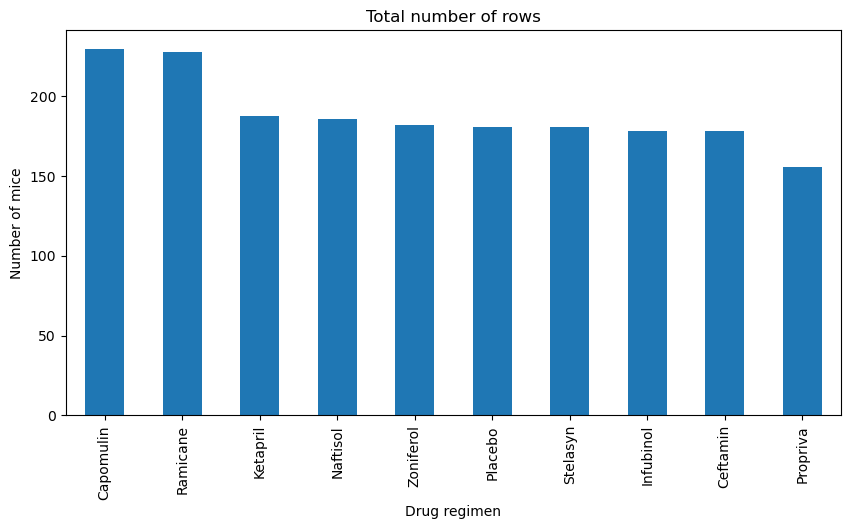

In [266]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plt.bar = clean_df["Drug Regimen"].value_counts().plot.bar(width=0.5, figsize=(10,5))

#set title & labels
plt.title("Total number of rows")
plt.xlabel("Drug regimen")
plt.ylabel("Number of mice")

plt.show()




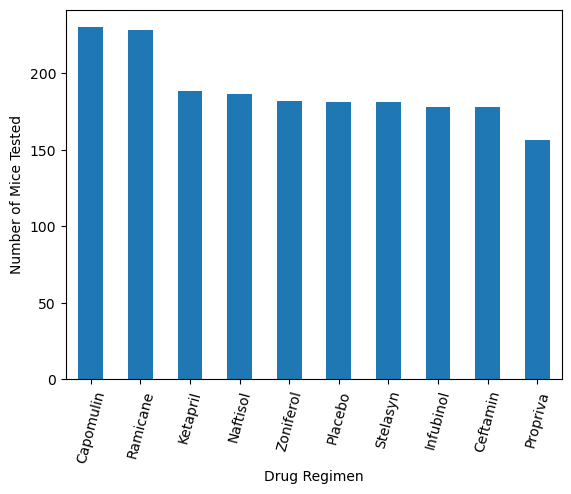

In [267]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")

#Set Title and Labels
plt.xlabel("Drug Regimen")
plt.xticks(rotation=75)
plt.ylabel("Number of Mice Tested")
plt.show()

Sex
Male      958
Female    930
Name: count, dtype: int64


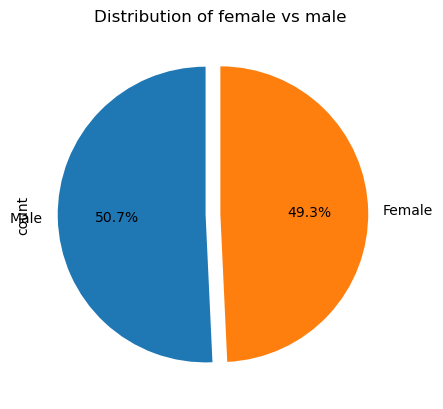

In [268]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_df["Sex"].value_counts()
print(sex_data)

#Plot a Pie chart
explode = (0.1, 0)
pie_plot = sex_data.plot.pie(explode=explode, autopct="%1.1f%%", startangle=90, title='Distribution of female vs male')


Sex
Male      958
Female    930
Name: count, dtype: int64


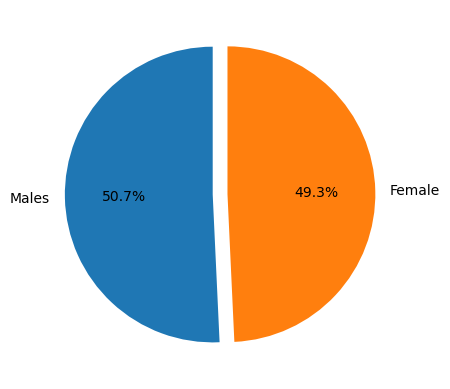

In [269]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data = clean_df["Sex"].value_counts()
print(sex_data)
explode = (0.1, 0)
labels = "Males", "Female"
plt.pie(sex_data, labels=labels, explode=explode, autopct="%1.1f%%", startangle=90)

plt.show()

## Quartiles, Outliers and Boxplots

In [328]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
great_tp =  clean_df.groupby(["Mouse ID"])["Timepoint"].max()
great_tp = great_tp.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = great_tp.merge(clean_df,on=['Mouse ID','Timepoint'],how="left") 
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [329]:
great_tp
great_tp.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [330]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Cetamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
     # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(tumor_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_results = tumor_data.loc[(tumor_data < lower_bound) | (tumor_data > upper_bound)]
    print(f"{drug}'s potential outliers: {outlier_results}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Cetamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [331]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Cetamin"]
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Cetamin']

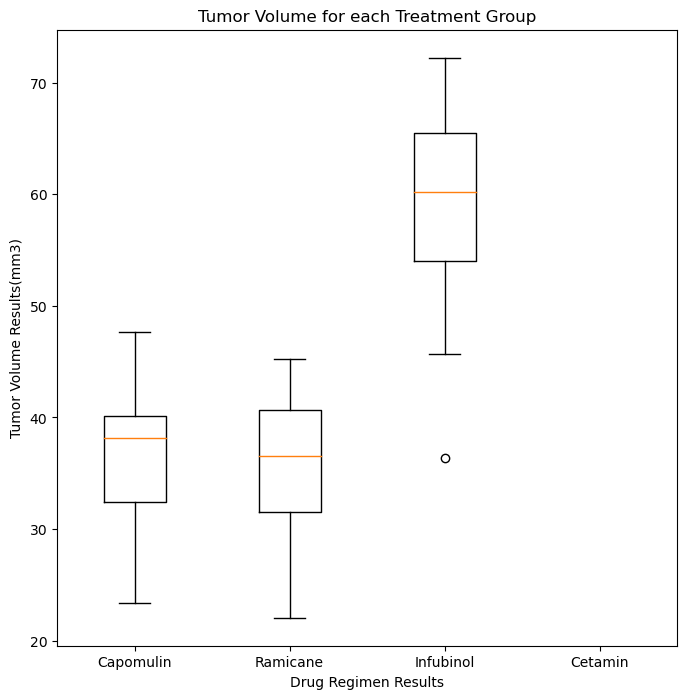

In [332]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.boxplot(tumor_vol, labels=treatments, widths = 0.4)
ax1.set_title("Tumor Volume for each Treatment Group")
ax1.set_xlabel("Drug Regimen Results")
ax1.set_ylabel("Tumor Volume Results(mm3)")

plt.show()

In [322]:
single_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557"]
single_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0
436,i557,Capomulin,Female,1,24,25,44.596219,0
437,i557,Capomulin,Female,1,24,30,45.261384,0
438,i557,Capomulin,Female,1,24,35,45.941949,0
439,i557,Capomulin,Female,1,24,40,46.821070,1
440,i557,Capomulin,Female,1,24,45,47.685963,1


## Line and Scatter Plots

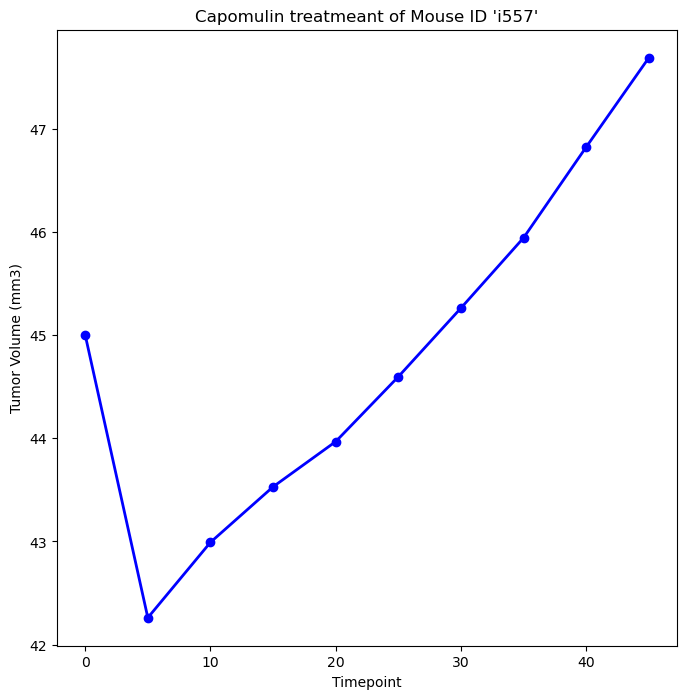

In [323]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_df


single_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557"]
single_mouse

#Line Plot
x_axis = single_mouse["Timepoint"]
tumor_volm = single_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(8,8))
plt.title("Capomulin treatmeant of Mouse ID 'i557'")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, tumor_volm,linewidth=2, marker="o",color="blue") 

plt.show()

In [343]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_reg_df = capomulin_df.groupby(['Mouse ID']).mean()

#Scatter Plot
fig1, ax1 = plt.subplots()
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(avg_reg_df['Weight (g)'],avg_reg_df['Tumor Volume (mm3)'], color="blue")

plt.show()

TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


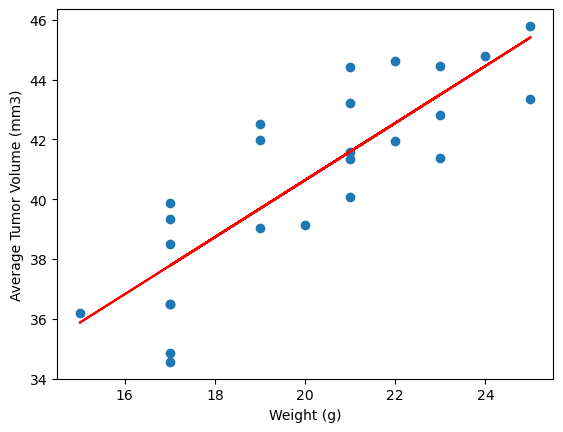

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
